In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [10]:
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [15]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

IndentationError: expected an indented block after 'if' statement on line 5 (3426017907.py, line 6)

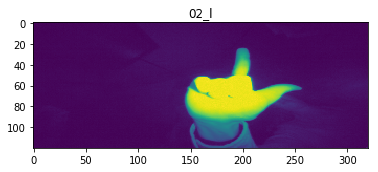

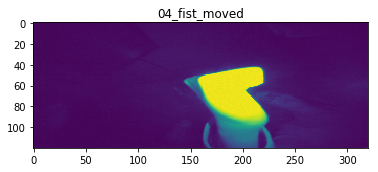

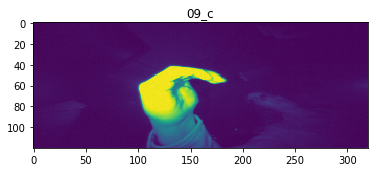

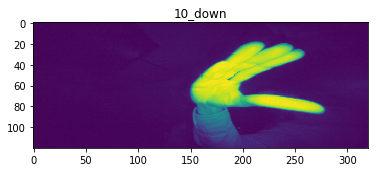

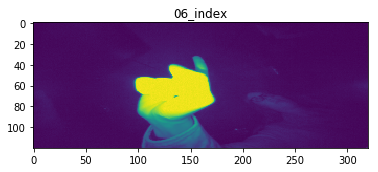

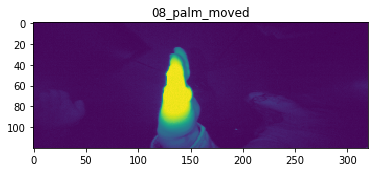

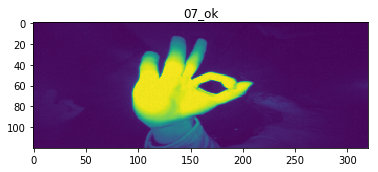

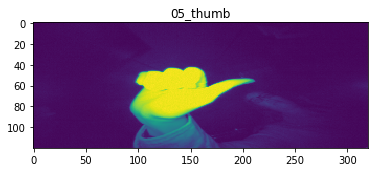

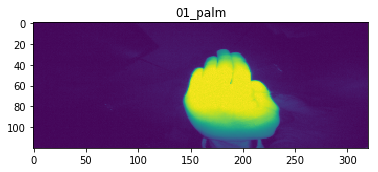

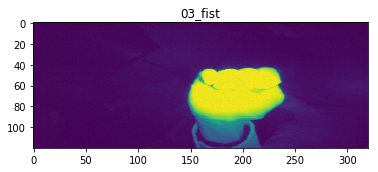

In [7]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [8]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

Using TensorFlow backend.


In [9]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [11]:
from keras import layers
from keras import models

In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Train on 16000 samples, validate on 2000 samples
Epoch 1/10
16000/16000 [==============================] - 10s 629us/step - loss: 0.3125 - acc: 0.9036 - val_loss: 0.0174 - val_acc: 0.9950
Epoch 2/10
16000/16000 [==============================] - 5s 319us/step - loss: 0.0272 - acc: 0.9951 - val_loss: 0.0065 - val_acc: 0.9990
Epoch 3/10
16000/16000 [==============================] - 5s 318us/step - loss: 0.0161 - acc: 0.9973 - val_loss: 0.0034 - val_acc: 0.9990
Epoch 4/10
16000/16000 [==============================] - 5s 318us/step - loss: 0.0049 - acc: 0.9989 - val_loss: 0.0050 - val_acc: 0.9990
Epoch 5/10
16000/16000 [==============================] - 5s 318us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0102 - val_acc: 0.9980
Epoch 6/10
16000/16000 [==============================] - 5s 317us/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0043 - val_acc: 0.9990
Epoch 7/10
16000/16000 [==============================] - 5s 316us/step - loss: 0.0015 - acc: 0.9998 - val_loss: 1.0294e-0

In [14]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 0s 213us/step
Accuracy:0.9995


In [15]:
model.save('recognizer.h5')